<a href="https://colab.research.google.com/github/jazaineam1/nopara/blob/main/Cuadernos/Kruskall_Wallis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Test de Kruskal-Wallis**

## ***Fundación Universidad de América***
>## **Estadística y Ciencias Actuariales**
>## ***Estadística No Paramétrica***
<img src="https://congresoambiental.car.gov.co/wp-content/uploads/2022/08/uniAmerica.png" alt="Imágen1" width="600" height="200">



El Test de Kruskal-Wallis, conocido también como la prueba H, representa una alternativa no paramétrica al ANOVA tradicional para comparar más de dos grupos cuando los datos no están relacionados. Este método extiende el enfoque del Test de Mann-Whitney para múltiples grupos y se basa en el uso de rangos para evaluar si diversas muestras provienen de una población común.

A diferencia de ANOVA, que compara medias entre los grupos, el Test de Kruskal-Wallis examina si las muestras provienen de una distribución uniforme, lo que implica que comparten una población común. En esencia, aunque con simplificaciones, puede decirse que este test se orienta a comparar medianas entre los grupos. Las hipótesis son:

$$H_0: \text{todas las muestras provienen de la misma población o distribución.$$ En contraste, la hipótesis alternativa} $$ $$H_a: \text{al menos una de las muestras proviene de una distribución distinta}$$.

Este test resulta especialmente útil cuando los datos presentan un orden inherente o cuando no se cumplen los supuestos necesarios para realizar un ANOVA. Por ejemplo, en estudios de diferencias de rendimiento, se puede recurrir a los tiempos totales de los participantes (para ANOVA) o a sus posiciones finales (para el Test de Kruskal-Wallis).

El Test se aplica a k grupos con n observaciones cada uno. Después de ordenar y asignar rangos a todas las observaciones, se espera que, bajo la hipótesis nula, los rangos sumados en cada grupo sean similares. De esta premisa se deriva el estadístico H:

$$H = \frac{12}{N(N+1)} \sum_{i=1}^{k} \frac{R_i^2}{n_i} - 3(N+1) $$

Condiciones para el Test de Kruskal-Wallis:

- No se requiere que las muestras sigan una distribución normal.
- Se espera homocedasticidad, o igualdad de varianzas entre los grupos, suponiendo que todas las muestras vienen de la misma población y comparten medianas similares.
- Los grupos deben tener distribuciones idénticas, aunque no necesariamente normales, como podría ser el caso de todas con sesgo hacia el mismo lado.

El estadístico H se compara según los casos:

- Para k = 3 grupos con no más de 5 observaciones cada uno, se utilizan tablas predefinidas de H.
- Para otros casos, H sigue una distribución χ² con k-1 grados de libertad.

Aunque ANOVA puede ser robusto frente a desviaciones de la normalidad, especialmente con tamaños de muestra medios o grandes, se prefiere el Test de Kruskal-Wallis cuando las muestras son asimétricas, con la misma dirección de sesgo y varianzas homogéneas. Para varianzas heterogéneas, se recomienda un ANOVA ajustado por Welch. El ANOVA no es adecuado para datos puramente ordinales, donde el Test de Kruskal-Wallis es la mejor opción.

## Comparaciones Post-Hoc


Al igual que ocurre con un ANOVA, si el test de Kruskal-Wallis es significativo, implica que al menos dos grupos de entre los comparados son significativamente diferentes, pero no indica cuales. Para saberlo es necesario compararlos todos entre ellos. Esto implica realizar una corrección del nivel de significancia para evitar incrementar el error de tipo I. Los dos métodos de comparación post-hoc más empleados para un test de Kruskal-Wallis son:

Test de Mann-Whitney entre cada par de grupos con corrección de significancia pairwise.wilcox.test().

Tukey’s range test: en R existe la función kruskalmc() del paquete pgirmess.

## Ejemplo
Hollander y Wolfe discuten en su trabajo un pequeño estudio que evaluó la eficiencia mucociliar a partir de la tasa de polvo en tres grupos diferentes: sujetos normales, sujetos con enfermedad obstructiva de las vías aéreas y sujetos con asbestosis. Las respuestas miden los tiempos de limpieza mucociliar de los sujetos, representando el tiempo que tarda en reducirse a la mitad la cantidad de moco. Los tamaños de las muestras son pequeños: n1 = n3 = 5 y n2 = 4, lo que suma un total de n = 14 sujetos. Los datos se presentan en vectores de R denominados normal, obstruct y asbestosis.

In [ ]:
normal <- c(3.9,3.0,2.5,2.6,3.2)
obstruct <- c(3.8,2.7,3.0,2.4)
asbestosis <- c(3.8,4.4,4.7,3.2,3.0)
x <- c(normal,obstruct,asbestosis)
g <- c(rep('Normal',5),rep('Obstruct',4),rep('asbestosis',5))


df=data.frame(Tratamiento=g,mucosidad=x)
df

Tratamiento,mucosidad
<chr>,<dbl>
Normal,3.9
Normal,3.0
Normal,2.5
Normal,2.6
Normal,3.2
Obstruct,3.8
Obstruct,2.7
Obstruct,3.0
Obstruct,2.4


In [ ]:
aggregate(mucosidad ~ Tratamiento, data = df, FUN = median)

Tratamiento,mucosidad
<chr>,<dbl>
asbestosis,3.80
Normal,3.00
Obstruct,2.85


In [ ]:
aggregate(mucosidad ~ Tratamiento, data = df, FUN = sd)

Tratamiento,mucosidad
<chr>,<dbl>
asbestosis,0.7362065
Normal,0.5594640
Obstruct,0.6020797


In [ ]:
install.packages(c('ggplot','car'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggplot’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


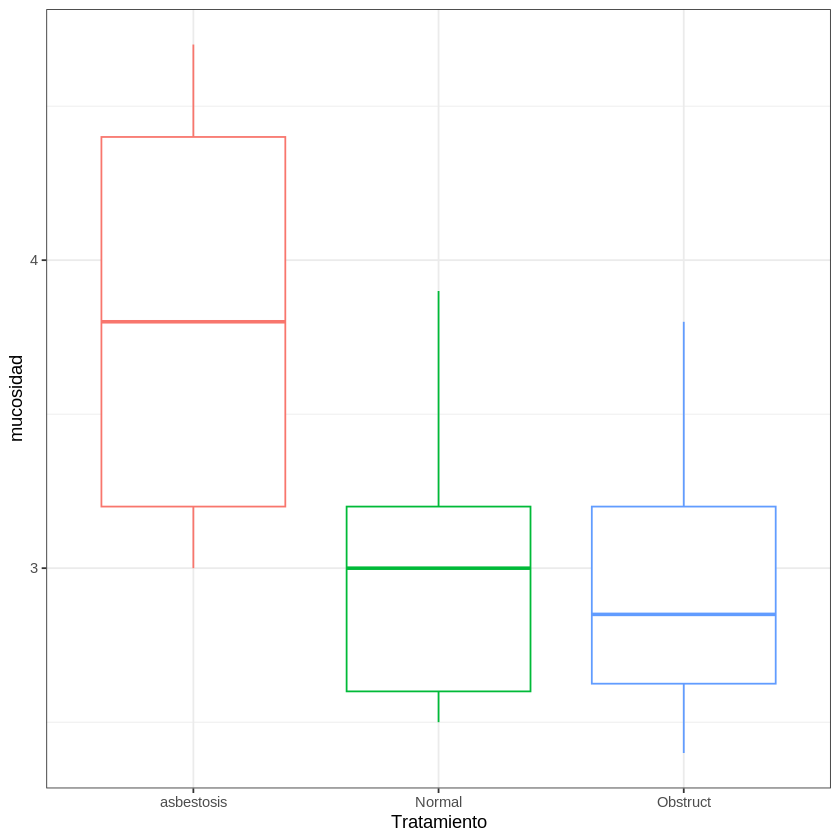

In [ ]:
library(ggplot2)

ggplot(data = df, mapping = aes(x = Tratamiento, y = mucosidad, colour = Tratamiento)) +
    geom_boxplot() +
    theme_bw() +
    theme(legend.position = "none")

La representación gráfica de los datos muestra que las muestras no se distribuyen de forma normal, lo que supone una limitación para emplear un test ANOVA.

**Condiciones**

Homocedasticidad: la varianza debe de ser constante entre todos los grupos.

In [ ]:
library(car)
leveneTest(mucosidad ~ Tratamiento, data = df, center = "median")

Warning message in leveneTest.default(y = y, group = group, ...):
“group coerced to factor.”


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,0.3721504,0.6976062
,11,NA,NA


In [ ]:
kruskal.test(mucosidad ~ Tratamiento, data = df)


	Kruskal-Wallis rank sum test

data:  mucosidad by Tratamiento
Kruskal-Wallis chi-squared = 3.8978, df = 2, p-value = 0.1424


El test encuentra significancia en la diferencia de al menos dos grupos.


## Comparaciones post-hoc para saber que dos grupos difieren

Existen diferentes métodos de corrección del nivel de significancia, entre ellos destacan el de Bonferroni que es muy estricto y el de Holm, este último parece ser más recomendado.

El método de Holm en las pruebas post-hoc de Kruskal-Wallis es una técnica de ajuste para múltiples comparaciones, usada para controlar la tasa de error de Tipo I (la probabilidad de rechazar incorrectamente una hipótesis nula verdadera) cuando se realizan varias pruebas estadísticas simultáneas. Esta situación suele presentarse después de que un test de Kruskal-Wallis indica diferencias significativas entre tres o más grupos, y deseamos determinar entre qué pares de grupos existen esas diferencias.

Cuando aplicamos la corrección de Holm, las hipótesis individuales (por ejemplo, las comparaciones entre pares de grupos) se ordenan de acuerdo a sus niveles de significancia p, de menor a mayor. La corrección de Holm ajusta los valores p comparándolos con un umbral decreciente que depende del rango de la comparación y del número total de comparaciones.

In [ ]:
pairwise.wilcox.test(x = df$mucosidad, g = df$Tratamiento, p.adjust.method = "holm" )

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  df$mucosidad and df$Tratamiento 

         asbestosis Normal
Normal   0.33       -     
Obstruct 0.33       0.81  

P value adjustment method: holm 

## Cálculo de tamaño del efecto

Finalmente, para aquellas comparaciones que se consideren significativas se tiene que reportar el tamaño del efecto (no existe forma de calcular el tamaño del efecto para el test de Kruskal-Wallis en conjunto). En este caso se han realizado comparaciones con Mann-Whitney-wilcox (ver en capítulo dedicado a este test para saber cómo se calcula).

## Ejercicios
1. Genera tres muestras de tamaño 10 de una distribución exponencial con λ = 0.10. Realiza tanto la prueba F como la prueba de Kruskal-Wallis (KW) para ver si hay diferencias de tratamiento en los tres grupos. Repite esto 1000 veces, registrando el valor-p para ambas pruebas. Compara los resultados de la simulación comparando los dos histogramas hechos a partir de estos valores-p. ¿Qué significan los resultados?

2. Las estadísticas de puntos por partido de la temporada de la NBA de 1993 fueron analizadas para jugadores de baloncesto que asistieron a cuatro escuelas de la ACC en particular: Duke, North Carolina, North Carolina State y Georgia Tech. Queremos averiguar si la puntuación es diferente para los jugadores de diferentes escuelas. ¿Se puede analizar esto con un procedimiento paramétrico? ¿Por qué sí o por qué no? La prueba F clásica que asume la normalidad de las poblaciones arroja un valor de F = 0.41 y no se rechaza H0. ¿Qué pasa con el procedimiento no paramétrico?


| Escuela          | Puntos |
|------------------|--------|
| Duke             | 7.5    |
| Duke             | 8.7    |
| Duke             | 7.1    |
| Duke             | 18.2   |
| Duke             | 12.9   |
| Duke             | 5.9    |
| Duke             | 1.9    |
| Duke             | 15.8   |
| UNC (North Carolina) | 5.5    |
| UNC (North Carolina) | 6.2    |
| UNC (North Carolina) | 13.0   |
| UNC (North Carolina) | 9.7    |
| UNC (North Carolina) | 4.6    |
| UNC (North Carolina) | 18.7   |
| UNC (North Carolina) | 8.7    |
| NCSU (North Carolina State) | 16.9   |
| NCSU (North Carolina State) | 4.5    |
| NCSU (North Carolina State) | 10.5   |
| NCSU (North Carolina State) | 4.4    |
| NCSU (North Carolina State) | 4.0    |
| NCSU (North Carolina State) | 14.0   |
| GT (Georgia Tech) | 7.9    |
| GT (Georgia Tech) | 7.8    |
| GT (Georgia Tech) | 14.5   |
| GT (Georgia Tech) | 6.1    |


**Referencia:**
Joaquín A.R.*Prueba de Kruskal-Wallis y pruebas post-hoc en R*. Recuperado de https://rpubs.com/Joaquin_AR/219504
